# Hacer graficas comparativas de KNN de cada metodo 

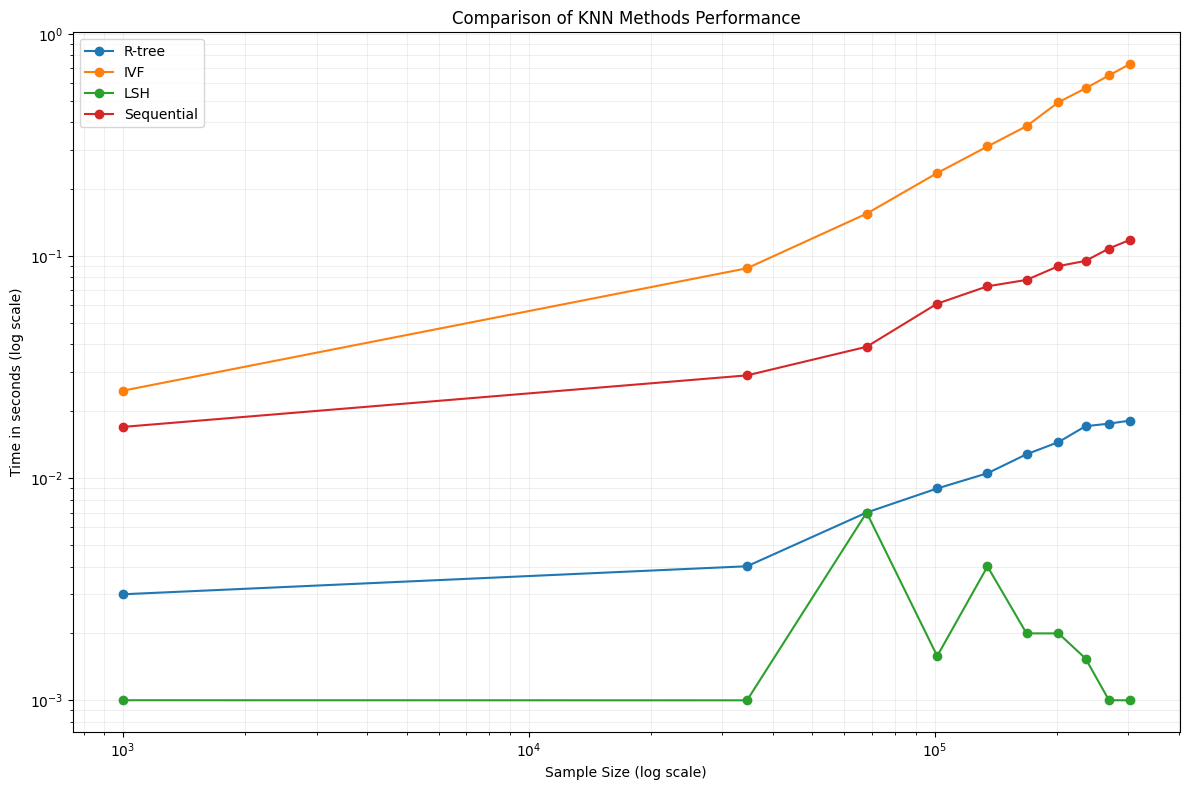

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def load_times(file_path):
    df = pd.read_csv(file_path)
    return df.iloc[:, 0].values, df.iloc[:, 1].values

def plot_comparison():
    plt.figure(figsize=(12, 8))
    
    methods = {
        'times_knn_rtree.csv': 'R-tree',
        'times_knn_ivf.csv': 'IVF',
        'times_knn_lsh.csv': 'LSH',
        'times_knn_seq.csv': 'Sequential'
    }
    
    times_path = os.path.join('src', 'Experiments', 'times')
    times_path = os.path.join(os.getcwd() , times_path)
    
    for filename, label in methods.items():
        file_path = os.path.join(times_path, filename)
        sizes, times = load_times(file_path)
        plt.loglog(sizes, times, marker='o', label=label)
    
    plt.grid(True, which="both", ls="-", alpha=0.2)
    plt.xlabel('Sample Size (log scale)')
    plt.ylabel('Time in seconds (log scale)')
    plt.title('Comparison of KNN Methods Performance')
    plt.legend()
    plt.tight_layout()
    plt.savefig('knn_methods_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()


plot_comparison()